In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
%matplotlib inline

C:\Users\sonih\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
crime=pd.read_csv("E:\\itsstudytym\\assignments\\Cluster\\crime_data C.csv")
crime=crime.drop('Unnamed: 0',axis=1)
crime.head()

In [5]:
z=linkage(crime,method='complete',metric='euclidean')

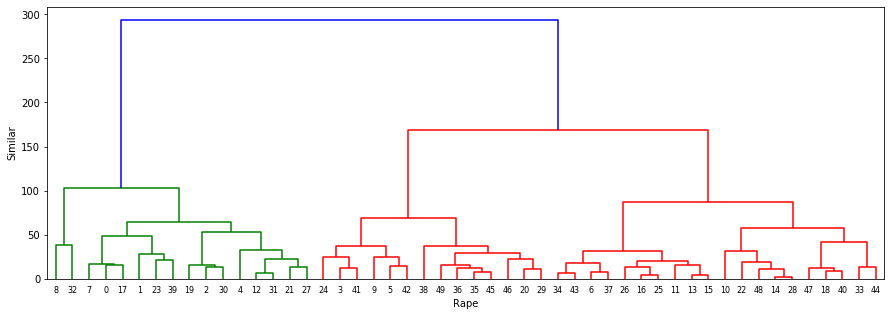

In [7]:
plt.figure(figsize=(15,5))
plt.xlabel('Rape')
plt.ylabel('Similar')
sch.dendrogram(z,leaf_rotation=0,leaf_font_size=8)
plt.show()

In [9]:
h_clust=AgglomerativeClustering(n_clusters=3,linkage='complete',affinity='euclidean').fit(crime)
h_clust.labels_

array([0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0,
       1, 0, 2, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1,
       1, 2, 2, 1, 1, 2], dtype=int64)

In [10]:
crime['Cluster']=pd.Series(h_clust.labels_)
crime.head()

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,0


In [11]:
crime=pd.read_csv("E:\\itsstudytym\\assignments\\Cluster\\crime_data C.csv")
crime=crime.drop('Unnamed: 0',axis=1)
crime.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [38]:
scale=MinMaxScaler()

In [48]:
scale.fit(crime.iloc[:,:])
crime.iloc[:,:]=scale.transform(crime.iloc[:,:])

In [50]:
crime.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [51]:
sse=[]
k_rng=range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(crime)
    sse.append(km.inertia_)

sse

[13.184122550256445,
 6.596893867946197,
 5.016388924690672,
 3.6834561535859134,
 3.184261813967722,
 2.9026922629696843,
 2.6208413369485912,
 2.3228668984534733,
 2.0433422101274403]

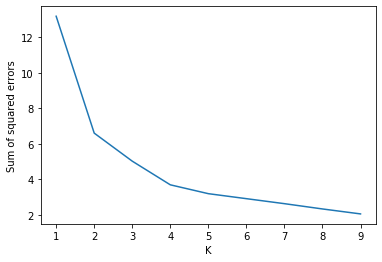

In [52]:
plt.xlabel('K')
plt.ylabel('Sum of squared errors')
plt.plot(k_rng,sse)

In [53]:
km=KMeans(n_clusters=4)

In [56]:
y_pred=km.fit_predict(crime.iloc[:,:])

In [57]:
y_pred

array([3, 2, 2, 3, 2, 2, 1, 1, 2, 3, 1, 0, 2, 1, 0, 1, 0, 3, 0, 2, 1, 2,
       0, 3, 1, 0, 0, 2, 0, 1, 2, 2, 3, 0, 1, 1, 1, 1, 1, 3, 0, 3, 2, 1,
       0, 1, 1, 0, 0, 1])

In [58]:
crime['Cluster']=y_pred

In [59]:
crime.head()

,Murder,Assault,UrbanPop,Rape,Cluster
0,0.746988,0.654110,0.440678,0.359173,3
1,0.554217,0.746575,0.271186,0.961240,2
2,0.439759,0.852740,0.813559,0.612403,2
3,0.481928,0.496575,0.305085,0.315245,3
4,0.493976,0.791096,1.000000,0.860465,2


In [60]:
crime1=crime[crime.Cluster==0]
crime2=crime[crime.Cluster==1]
crime3=crime[crime.Cluster==2]
crime4=crime[crime.Cluster==3]

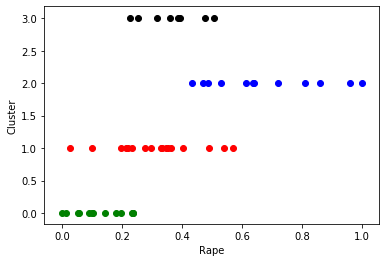

In [61]:
plt.scatter(crime1.Rape,crime1['Cluster'],color='green')
plt.scatter(crime2.Rape,crime2['Cluster'],color='red')
plt.scatter(crime3.Rape,crime3['Cluster'],color='blue')
plt.scatter(crime4.Rape,crime4['Cluster'],color='black')
plt.xlabel("Rape")
plt.ylabel("Cluster")
plt.show()